# Compare Wikipedia dumps

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from matplotlib import pyplot as plt
import numpy as np

## Read the graphs

In [2]:
# path to Parquet files
DATA_PATH = "/mnt/data/wikipedia/dumps-pre-processed/"

In [3]:
# initialise sparkContext
spark = SparkSession.builder \
    .master('local') \
    .appName('GraphDiff') \
    .config('spark.executor.memory', '32gb') \
    .config("spark.cores.max", "*") \
    .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [4]:
# read pages and categories into a DF
normal_pages_20190601_df = sqlContext.read.parquet(DATA_PATH + "20190601/page/normal_pages/*")
category_pages_20190601_df = sqlContext.read.parquet(DATA_PATH + "20190601/page/category_pages/*")

normal_pages_20190520_df = sqlContext.read.parquet(DATA_PATH + "20190520/page/normal_pages/*")
category_pages_20190520_df = sqlContext.read.parquet(DATA_PATH + "20190520/page/category_pages/*")

normal_pages_20190501_df = sqlContext.read.parquet(DATA_PATH + "20190501/page/normal_pages/*")
category_pages_20190501_df = sqlContext.read.parquet(DATA_PATH + "20190501/page/category_pages/*")

normal_pages_20190420_df = sqlContext.read.parquet(DATA_PATH + "20190420/page/normal_pages/*")
category_pages_20190420_df = sqlContext.read.parquet(DATA_PATH + "20190420/page/category_pages/*")

normal_pages_20190401_df = sqlContext.read.parquet(DATA_PATH + "20190401/page/normal_pages/*")
category_pages_20190401_df = sqlContext.read.parquet(DATA_PATH + "20190401/page/category_pages/*")

normal_pages_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/page/normal_pages/*")
category_pages_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/page/category_pages/*")

normal_pages_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/page/normal_pages/*")
category_pages_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/page/category_pages/*")

normal_pages_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/page/normal_pages/*")
category_pages_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/page/category_pages/*")

In [57]:
count_pages_20190601 = normal_pages_20190601_df.count()
count_categories_20190601 = category_pages_20190601_df.count()

count_pages_20190520 = normal_pages_20190520_df.count()
count_categories_20190520 = category_pages_20190520_df.count()

count_pages_20190501 = normal_pages_20190501_df.count()
count_categories_20190501 = category_pages_20190501_df.count()

count_pages_20190420 = normal_pages_20190420_df.count()
count_categories_20190420 = category_pages_20190420_df.count()

count_pages_20190401 = normal_pages_20190401_df.count()
count_categories_20190401 = category_pages_20190401_df.count()

count_pages_20190320 = normal_pages_20190320_df.count()
count_categories_20190320 = category_pages_20190320_df.count()

count_pages_20190301 = normal_pages_20190301_df.count()
count_categories_20190301 = category_pages_20190301_df.count()

count_pages_20180801 = normal_pages_20180801_df.count()
count_categories_20180801 = category_pages_20180801_df.count()

In [58]:
print("Number of normal pages for 20190401: " + str(count_pages_20190601))
print("Number of category pages for 20190401: " + str(count_categories_20190601))

print("Number of normal pages for 20190520: " + str(count_pages_20190520))
print("Number of category pages for 20190520: " + str(count_categories_20190520))

print("Number of normal pages for 20190501: " + str(count_pages_20190501))
print("Number of category pages for 20190501: " + str(count_categories_20190501))

print("Number of normal pages for 20190420: " + str(count_pages_20190420))
print("Number of category pages for 20190420: " + str(count_categories_20190420))

print("Number of normal pages for 20190401: " + str(count_pages_20190401))
print("Number of category pages for 20190401: " + str(count_categories_20190401))

print("Number of normal pages for 20190320: " + str(count_pages_20190320))
print("Number of category pages for 20190320: " + str(count_categories_20190320))

print("Number of normal pages for 20190301: " + str(count_pages_20190301))
print("Number of category pages for 20190301: " + str(count_categories_20190301))

print("Number of normal pages for 20180801: " + str(count_pages_20180801))
print("Number of category pages for 20180801: " + str(count_categories_20180801))

Number of normal pages for 20190401: 5870210
Number of category pages for 20190401: 1833697
Number of normal pages for 20190520: 5862580
Number of category pages for 20190520: 1830591
Number of normal pages for 20190501: 5853009
Number of category pages for 20190501: 1822452
Number of normal pages for 20190420: 5847311
Number of category pages for 20190420: 1818574
Number of normal pages for 20190401: 5836035
Number of category pages for 20190401: 1813729
Number of normal pages for 20190320: 5828462
Number of category pages for 20190320: 1810370
Number of normal pages for 20190301: 5816996
Number of category pages for 20190301: 1803414
Number of normal pages for 20180801: 5690369
Number of category pages for 20180801: 1726005


Text(0.5, 1.0, 'Pages')

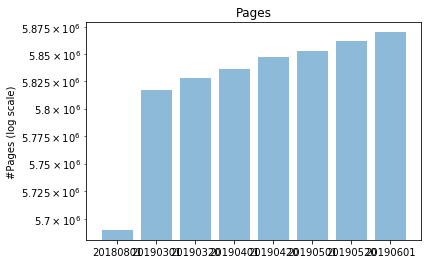

In [59]:
dates = ('20180801', '20190301', '20190320', '20190401', '20190420', '20190501', '20190520', '20190601')
y_pos = np.arange(len(dates))
counts = [count_pages_20180801, count_pages_20190301, count_pages_20190320, count_pages_20190401, count_pages_20190420, count_pages_20190501, count_pages_20190520, count_pages_20190601]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Pages (log scale)')
plt.yscale('log')
plt.title('Pages')

Text(0.5, 1.0, 'Categories')

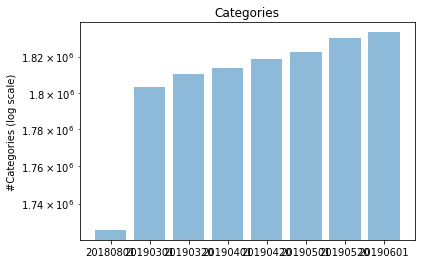

In [60]:
counts = [count_categories_20180801, count_categories_20190301, count_categories_20190320, count_categories_20190401, count_categories_20190420, count_categories_20190501, count_categories_20190520, count_categories_20190601]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Categories (log scale)')
plt.yscale('log')
plt.title('Categories')

In [6]:
# read links into a DF

pagelinks_20190601_df = sqlContext.read.parquet(DATA_PATH + "20190601/pagelinks/*")
categorylinks_20190601_df = sqlContext.read.parquet(DATA_PATH + "20190601/categorylinks/*")

pagelinks_20190520_df = sqlContext.read.parquet(DATA_PATH + "20190520/pagelinks/*")
categorylinks_20190520_df = sqlContext.read.parquet(DATA_PATH + "20190520/categorylinks/*")

pagelinks_20190501_df = sqlContext.read.parquet(DATA_PATH + "20190501/pagelinks/*")
categorylinks_20190501_df = sqlContext.read.parquet(DATA_PATH + "20190501/categorylinks/*")

pagelinks_20190420_df = sqlContext.read.parquet(DATA_PATH + "20190420/pagelinks/*")
categorylinks_20190420_df = sqlContext.read.parquet(DATA_PATH + "20190420/categorylinks/*")

pagelinks_20190401_df = sqlContext.read.parquet(DATA_PATH + "20190401/pagelinks/*")
categorylinks_20190401_df = sqlContext.read.parquet(DATA_PATH + "20190401/categorylinks/*")

pagelinks_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/pagelinks/*")
categorylinks_20190320_df = sqlContext.read.parquet(DATA_PATH + "20190320/categorylinks/*")

pagelinks_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/pagelinks/*")
categorylinks_20190301_df = sqlContext.read.parquet(DATA_PATH + "20190301/categorylinks/*")

pagelinks_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/pagelinks/*")
categorylinks_20180801_df = sqlContext.read.parquet(DATA_PATH + "20180801/categorylinks/*")

In [62]:
count_pagelinks_20190601 = pagelinks_20190601_df.count()
count_categorylinks_20190601 = categorylinks_20190601_df.count()

count_pagelinks_20190520 = pagelinks_20190520_df.count()
count_categorylinks_20190520 = categorylinks_20190520_df.count()

count_pagelinks_20190501 = pagelinks_20190501_df.count()
count_categorylinks_20190501 = categorylinks_20190501_df.count()

count_pagelinks_20190420 = pagelinks_20190420_df.count()
count_categorylinks_20190420 = categorylinks_20190420_df.count()

count_pagelinks_20190401 = pagelinks_20190401_df.count()
count_categorylinks_20190401 = categorylinks_20190401_df.count()

count_pagelinks_20190320 = pagelinks_20190320_df.count()
count_categorylinks_20190320 = categorylinks_20190320_df.count()

count_pagelinks_20190301 = pagelinks_20190301_df.count()
count_categorylinks_20190301 = categorylinks_20190301_df.count()

count_pagelinks_20180801 = pagelinks_20180801_df.count()
count_categorylinks_20180801 = categorylinks_20180801_df.count()

In [63]:
print("Number of pagelinks for 20190601: " + str(count_pagelinks_20190601))
print("Number of categorylinks for 20190601: " + str(count_categorylinks_20190601))

print("Number of pagelinks for 20190520: " + str(count_pagelinks_20190520))
print("Number of categorylinks for 20190520: " + str(count_categorylinks_20190520))

print("Number of pagelinks for 20190501: " + str(count_pagelinks_20190501))
print("Number of categorylinks for 20190501: " + str(count_categorylinks_20190501))

print("Number of pagelinks for 20190420: " + str(count_pagelinks_20190420))
print("Number of categorylinks for 20190420: " + str(count_categorylinks_20190420))

print("Number of pagelinks for 20190401: " + str(count_pagelinks_20190401))
print("Number of categorylinks for 20190401: " + str(count_categorylinks_20190401))

print("Number of pagelinks for 20190320: " + str(count_pagelinks_20190320))
print("Number of categorylinks for 20190320: " + str(count_categorylinks_20190320))

print("Number of pagelinks for 20190301: " + str(count_pagelinks_20190301))
print("Number of categorylinks for 20190301: " + str(count_categorylinks_20190301))

print("Number of pagelinks for 20180801: " + str(count_pagelinks_20180801))
print("Number of categorylinks for 20180801: " + str(count_categorylinks_20180801))

Number of pagelinks for 20190601: 484408612
Number of categorylinks for 20190601: 66104475
Number of pagelinks for 20190520: 483237508
Number of categorylinks for 20190520: 65943209
Number of pagelinks for 20190501: 481311258
Number of categorylinks for 20190501: 65845422
Number of pagelinks for 20190420: 480308241
Number of categorylinks for 20190420: 65777079
Number of pagelinks for 20190401: 478664986
Number of categorylinks for 20190401: 65505520
Number of pagelinks for 20190320: 477578102
Number of categorylinks for 20190320: 65261669
Number of pagelinks for 20190301: 475679782
Number of categorylinks for 20190301: 64774515
Number of pagelinks for 20180801: 456564006
Number of categorylinks for 20180801: 60555403


Text(0.5, 1.0, 'Pagelinks')

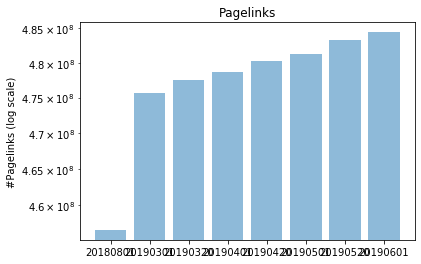

In [64]:
counts = [count_pagelinks_20180801, count_pagelinks_20190301, count_pagelinks_20190320, count_pagelinks_20190401, count_pagelinks_20190420, count_pagelinks_20190501, count_pagelinks_20190520, count_pagelinks_20190601]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Pagelinks (log scale)')
plt.yscale('log')
plt.title('Pagelinks')

Text(0.5, 1.0, 'Categorylinks')

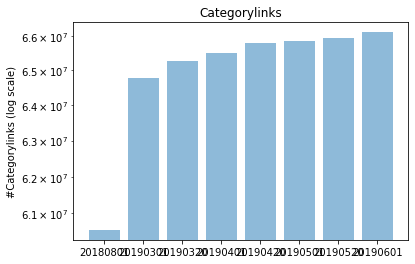

In [65]:
counts = [count_categorylinks_20180801, count_categorylinks_20190301, count_categorylinks_20190320, count_categorylinks_20190401, count_categorylinks_20190420, count_categorylinks_20190501, count_categorylinks_20190520, count_categorylinks_20190601]

plt.bar(y_pos, counts, align='center', alpha=0.5)
plt.xticks(y_pos, dates)
plt.ylabel('#Categorylinks (log scale)')
plt.yscale('log')
plt.title('Categorylinks')

## Extract delta graphs (Added_edges - Removed_edges)

In [7]:
pagelinks_graph_t1 = pagelinks_20190301_df
categorylinks_graph_t1 = categorylinks_20190301_df
pages_graph_t1 = normal_pages_20190301_df
categories_graph_t1 = category_pages_20190301_df

pagelinks_graph_t2 = pagelinks_20190320_df
categorylinks_graph_t2 = categorylinks_20190320_df
pages_graph_t2 = normal_pages_20190320_df
categories_graph_t2 = category_pages_20190320_df

Pages

In [8]:
added_pages = pages_graph_t2.subtract(pages_graph_t1)
added_pages.cache()

DataFrame[id: int, title: string, isRedirect: boolean, isNew: boolean]

In [9]:
removed_pages = pages_graph_t1.subtract(pages_graph_t2)
removed_pages.cache()

DataFrame[id: int, title: string, isRedirect: boolean, isNew: boolean]

In [10]:
added_pages_list = added_pages.select("id").rdd.flatMap(lambda x: x).collect()
removed_pages_list = removed_pages.select("id").rdd.flatMap(lambda x: x).collect()

In [11]:
added_pagelinks = pagelinks_graph_t2.subtract(pagelinks_graph_t1)
added_pagelinks.cache()

DataFrame[from: int, dest: int]

In [12]:
removed_pagelinks = pagelinks_graph_t1.subtract(pagelinks_graph_t2)
removed_pagelinks.cache()

DataFrame[from: int, dest: int]

In [13]:
added_pagelinks.show()

+----+--------+
|from|    dest|
+----+--------+
| 303|52878007|
| 872|  212031|
| 872|  400421|
|1081|52119515|
|1146|  208413|
|1239| 1218392|
|1239|33013530|
|2154|16182306|
|2472|13933770|
|2503|60245513|
|2764|60276543|
|2927|54044043|
|3352|26641093|
|3352|38872865|
|3454|60267715|
|3832|  340546|
|3874| 1254082|
|3874|22431775|
|4371| 1697069|
|4427| 4671895|
+----+--------+
only showing top 20 rows



In [14]:
added_pagelinks_new_pages = added_pagelinks[added_pagelinks["from"].isin(added_pages_list) | added_pagelinks["dest"].isin(added_pages_list)]

In [15]:
removed_pagelinks_new_pages = removed_pagelinks[removed_pagelinks["from"].isin(removed_pages_list) | removed_pagelinks["dest"].isin(removed_pages_list)]

In [16]:
added_pagelinks_new_pages.count()

928874

In [17]:
removed_pagelinks_new_pages.count()

143205

In [76]:
# added_pagelinks.count()

2836077

In [112]:
# removed_pagelinks.count()

937757

In [18]:
new_pages_with_links_list = list(set(added_pagelinks_new_pages.select("from").rdd.flatMap(lambda x: x).collect() + added_pagelinks_new_pages.select("dest").rdd.flatMap(lambda x: x).collect()))

In [19]:
len(new_pages_with_links_list)

326058

In [20]:
# added_pages.repartition(1).write.csv('added_pages.csv')

In [21]:
number_of_new_links_per_page = added_pagelinks_new_pages.groupby('from').count()

In [22]:
# number_of_new_links_per_page.repartition(1).write.csv('link_count.csv')

In [23]:
pages_links_count = number_of_new_links_per_page.join(added_pages, number_of_new_links_per_page['from'] == added_pages['id'])

In [24]:
# pages_links_count.repartition(1).write.csv('new_pages_links_count.csv')

In [27]:
# added_pagelinks_new_pages.repartition(1).write.csv('edge_list.csv')

Categories

In [86]:
added_categorylinks = categorylinks_graph_t2.subtract(categorylinks_graph_t1)
added_categorylinks.cache()

DataFrame[from: int, title: string, id: int, ctype: string]

In [87]:
removed_categorylinks = categorylinks_graph_t1.subtract(categorylinks_graph_t2)
removed_categorylinks.cache()

DataFrame[from: int, title: string, id: int, ctype: string]

In [88]:
added_categorylinks.count()

732113

In [89]:
removed_categorylinks.count()

244959